
## Foundations of Machine Learning and Neural Networks

* gradients



In [35]:

import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt


In [36]:

def compute_z(a, b, c):
    r1 = torch.sub(a, b)
    r2 = torch.mul(r1, 2)
    z = torch.add(r2, c)
    return z


In [37]:

compute_z( torch.tensor(3), torch.tensor(2), torch.tensor(1) )


tensor(3)

In [38]:

a = torch.tensor(3.14, requires_grad=True)
a


tensor(3.1400, requires_grad=True)

In [39]:

b = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
b


tensor([1., 2., 3.], requires_grad=True)

In [40]:

## Glorot initialization with xavier_normal

torch.manual_seed(1)
w = torch.empty(2, 3)
w


tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [41]:

nn.init.xavier_normal_(w)
w


tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])

In [42]:

class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.empty((2, 3), requires_grad=True)
        nn.init.xavier_normal_(self.w1)
        self.w2 = torch.empty((1, 2), requires_grad=True)
        nn.init.xavier_normal_(self.w2)



## Compute gradients

* automatic differentiation


In [43]:

w = torch.tensor(1.0, requires_grad=True)
w


tensor(1., requires_grad=True)

In [44]:

b = torch.tensor(0.5, requires_grad=True)
b


tensor(0.5000, requires_grad=True)

In [45]:

x = torch.tensor([1.4])
x


tensor([1.4000])

In [46]:

y = torch.tensor(2.1)
y


tensor(2.1000)

In [47]:

z = torch.add(  torch.mul(w, x), b  )
z


tensor([1.9000], grad_fn=<AddBackward0>)

In [48]:

loss = (y-z).pow(2).sum()
loss


tensor(0.0400, grad_fn=<SumBackward0>)

In [49]:

loss.backward()
loss


tensor(0.0400, grad_fn=<SumBackward0>)

In [50]:

print("dL/dw: ", w.grad)
print("dL/db: ", b.grad)


dL/dw:  tensor(-0.5600)
dL/db:  tensor(-0.4000)



$  \huge \frac{dL}{dw} = 2x(wx + b -y) $ 


In [51]:

## verify computed gradient

dL_dw = 2*x*((w*x+b) - y)

print(dL_dw)


tensor([-0.5600], grad_fn=<MulBackward0>)



## nn.Sequential()


In [52]:

model = nn.Sequential(
              nn.Linear(4, 16),
              nn.ReLU(),
              nn.Linear(16, 32),
              nn.ReLU()
)

model


Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)


## XOR


In [53]:

np.random.seed(1)

X = np.random.uniform(  low=-1, high=1, size=(200, 2)   )

X.shape


(200, 2)

In [54]:

X


array([[-1.65955991e-01,  4.40648987e-01],
       [-9.99771250e-01, -3.95334855e-01],
       [-7.06488218e-01, -8.15322810e-01],
       [-6.27479577e-01, -3.08878546e-01],
       [-2.06465052e-01,  7.76334680e-02],
       [-1.61610971e-01,  3.70439001e-01],
       [-5.91095501e-01,  7.56234873e-01],
       [-9.45224814e-01,  3.40935020e-01],
       [-1.65390395e-01,  1.17379657e-01],
       [-7.19226123e-01, -6.03797022e-01],
       [ 6.01489137e-01,  9.36523151e-01],
       [-3.73151644e-01,  3.84645231e-01],
       [ 7.52778305e-01,  7.89213327e-01],
       [-8.29911577e-01, -9.21890434e-01],
       [-6.60339161e-01,  7.56285007e-01],
       [-8.03306332e-01, -1.57784750e-01],
       [ 9.15779060e-01,  6.63305699e-02],
       [ 3.83754228e-01, -3.68968738e-01],
       [ 3.73001855e-01,  6.69251344e-01],
       [-9.63423445e-01,  5.00288630e-01],
       [ 9.77722178e-01,  4.96331309e-01],
       [-4.39112016e-01,  5.78558657e-01],
       [-7.93547987e-01, -1.04212948e-01],
       [ 8.

In [55]:

y = np.ones(   len(X)    ) 

y


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [56]:

y.shape


(200,)

In [57]:

## XOR data

y[  X[:, 0] * X[:, 1] < 0   ] = 0


In [58]:

y


array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.])

In [59]:

print(y.shape)
print(X.shape)


(200,)
(200, 2)


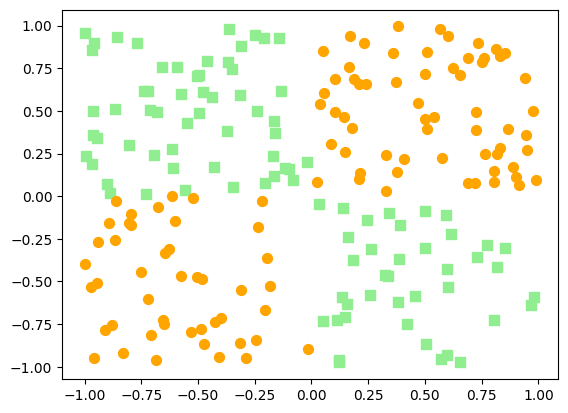

In [60]:

## plt.scatter(X[:, 0], X[:, 1] )


plt.scatter(X[y==0,0],
            X[y==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='class0')
plt.scatter(X[y==1,0],
            X[y==1,1],
            s=50,
            c='orange',
            marker='o',
            label='class1')
plt.show()


In [61]:

X_train = X[:100, :]
y_train = y[:100]

X_test  = X[100:, :]
y_test  = y[100:]


In [ ]:

# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
